In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [4]:
# Load the dataset
df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')

In [5]:
# Data Analysis
# Check the first few rows of the dataframe
print(df.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


In [6]:
# Check basic statistics of the dataset
print(df.describe())

                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000


In [7]:
# Check for missing values
print(df.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


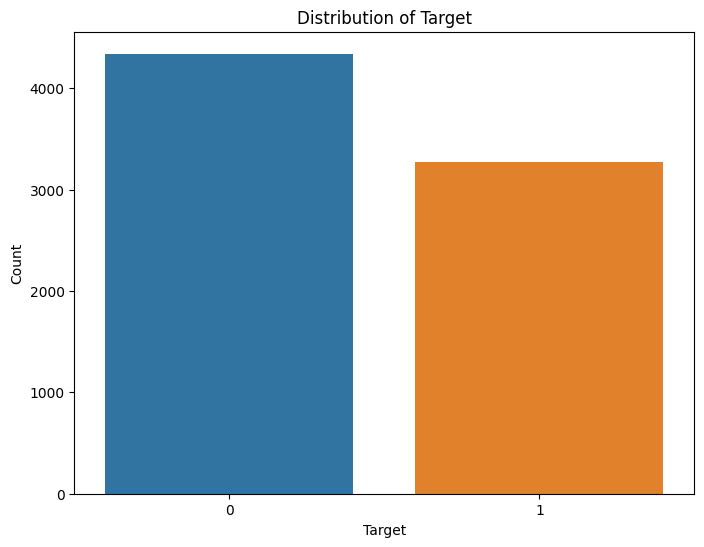

In [30]:
# Data Visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


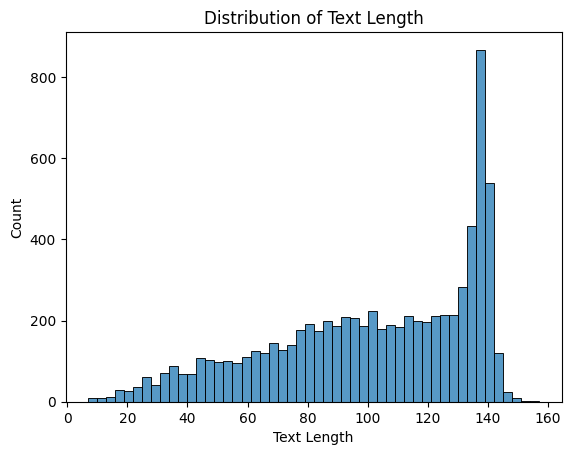

In [13]:
# Text Analysis
# Check the length of tweets
df['text_length'] = df['text'].apply(len)
# Visualize text length distribution
sns.histplot(df['text_length'], bins=50)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

In [39]:
import re
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [33]:

df['text'] = df['text'].apply(lambda x: re.sub(r"[^A-Za-z\s]", "", x).lower())

<BarContainer object of 1030 artists>

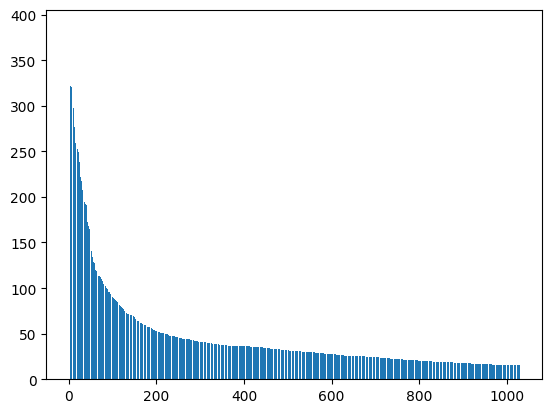

In [40]:
all_train_words = np.array(list(itertools.chain(*df['text'].str.split())))
words, counts = np.unique(all_train_words, return_counts=True)
inds = np.argsort(counts)[::-1]
words, counts = words[inds], counts[inds]

# Remove rare words
lower_bound = 15# 20
upper_bound = 400 #300
words = words[(counts < upper_bound) & (counts > lower_bound)]
counts = counts[(counts < upper_bound) & (counts > lower_bound)]
plt.bar(range(len(counts)), counts)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Data Preprocessing
# Remove missing values
df.dropna(subset=['text'], inplace=True)

# Split data into features (X) and target variable (y)
X = df['text']
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering
# Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Handling Imbalanced Data
# Resample the training data using Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_tfidf, y_train)

# Model Building and Training
# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Model Evaluation
# Predictions on the testing set
y_pred = rf_classifier.predict(X_test_tfidf)

# Print evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       874
           1       0.77      0.66      0.71       649

    accuracy                           0.77      1523
   macro avg       0.77      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523


Confusion Matrix:
[[747 127]
 [220 429]]

Accuracy Score: 0.7721602101116218


In [36]:
# Feature Engineering
# Convert text data into numerical format using TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['text'])
y = df['target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building (using Naive Bayes as an example)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Model Evaluation
predictions = nb_model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print("\nAccuracy Score:", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       874
           1       0.81      0.68      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523

[[769 105]
 [207 442]]

Accuracy Score: 0.7951411687458962


In [17]:
 #Predict on new data
# Load and preprocess the test data
test_df = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

test_df['text'] = test_df['text'].apply(lambda x: re.sub(r"[^A-Za-z\s]", "", x).lower())
test_X = tfidf.transform(test_df['text'])

# Make predictions
test_predictions = nb_model.predict(test_X)

# Add predictions to the test dataframe
test_df['target'] = test_predictions

# Save predictions to a new CSV file
test_df[['id', 'target']].to_csv('submission.csv', index=False)
